## Erdos data science - Fall 2023

UCI Diabetes 
 - “The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy.”
- https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
D_012 = pd.read_csv("data/diabetes_012_health_indicators_BRFSS2015.csv")
D_Bin_50 = pd.read_csv("data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
D_Bin_full = pd.read_csv("data/diabetes_binary_health_indicators_BRFSS2015.csv")

In [4]:
D_Bin_full.sample(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
364,0.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,9.0,4.0,6.0
14088,0.0,0.0,1.0,1.0,21.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,3.0,0.0,10.0,0.0,0.0,8.0,6.0,4.0
5056,0.0,1.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,2.0,1.0,1.0,11.0,6.0,8.0
244518,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,25.0,0.0,1.0,2.0,6.0,7.0
170653,0.0,0.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0


In [11]:
# count type of response in first column of D_Bin_full
D_Bin_50["Diabetes_binary"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [8]:
D_Bin_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [7]:
D_012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

# EDA on the diabetes_binary_health_indicators_BRFSS2015.csv

In [26]:
data2use = D_Bin_full

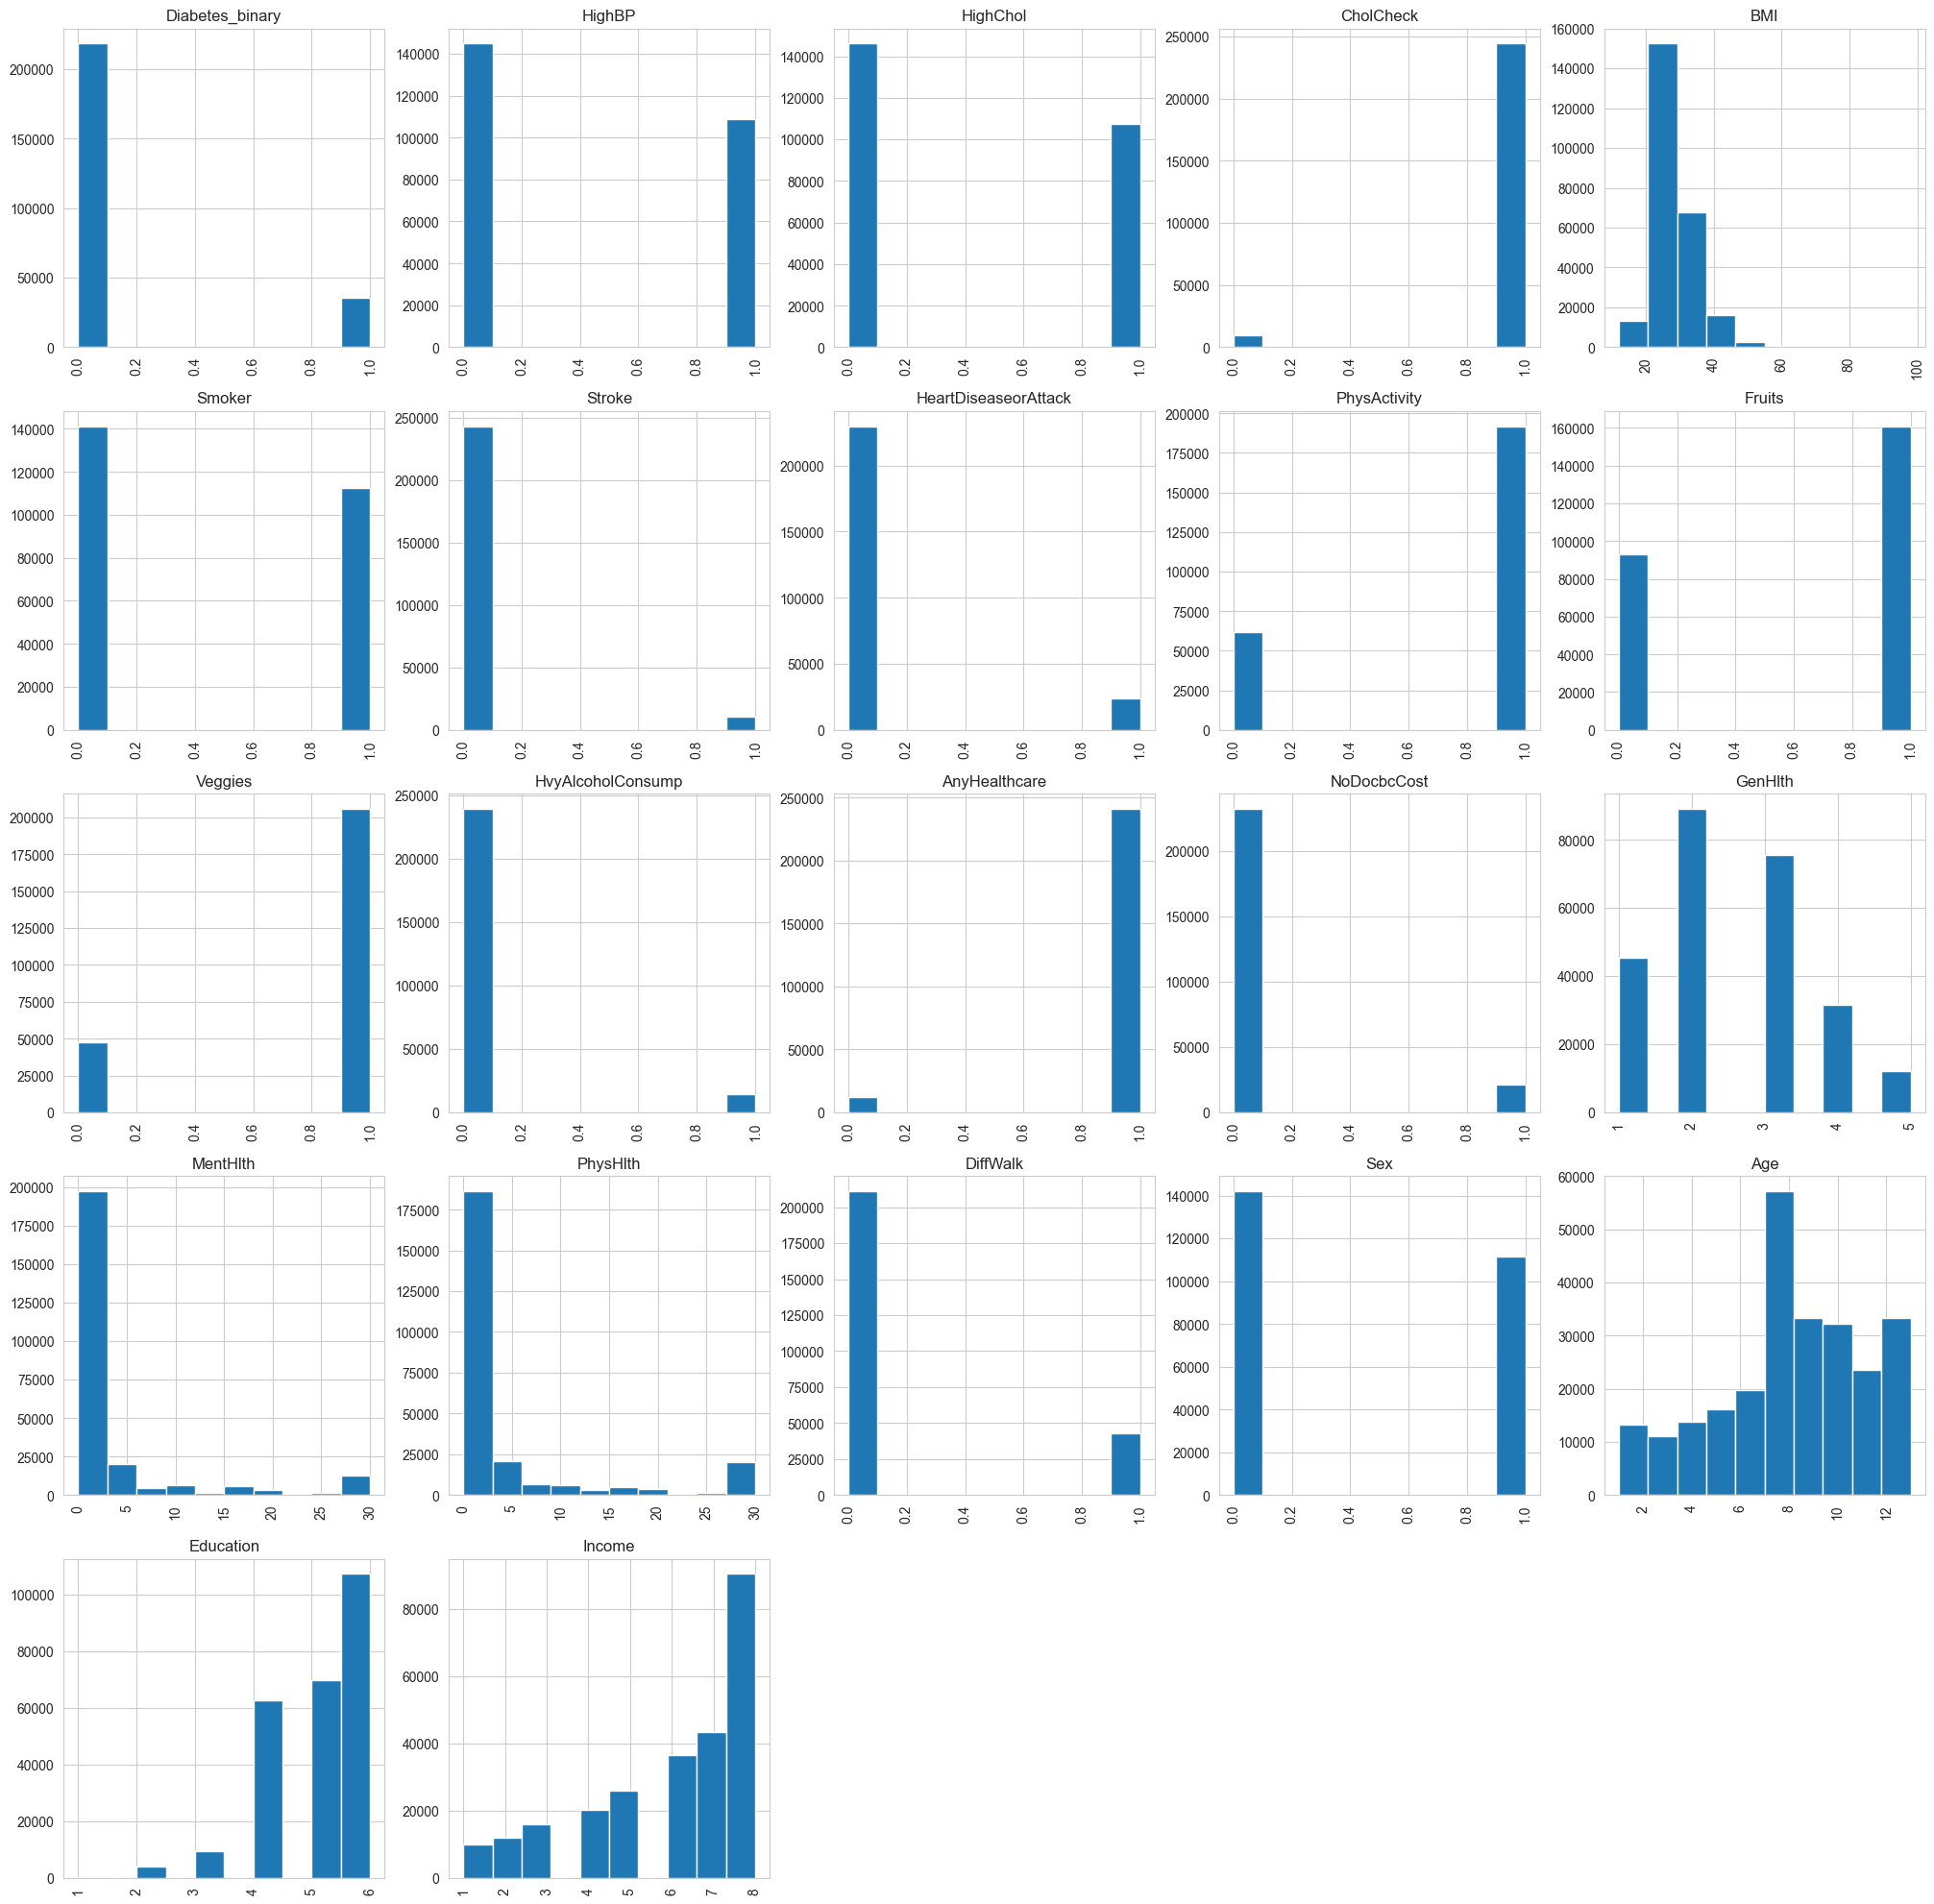

In [27]:
#make a hist for each column of data2use in a grid
fig = plt.figure(figsize=(25, 25))
cols = 5
rows = 5

for i, column in enumerate(data2use.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data2use.dtypes[column] == object:
        data2use[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data2use[column].hist(axes=ax)
        plt.xticks(rotation="vertical")

In [28]:
DataCorr_Bin_full = data2use.corr(method="spearman")


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 1, 'Diabetes_binary'),
  Text(1.5, 1, 'HighBP'),
  Text(2.5, 1, 'HighChol'),
  Text(3.5, 1, 'CholCheck'),
  Text(4.5, 1, 'BMI'),
  Text(5.5, 1, 'Smoker'),
  Text(6.5, 1, 'Stroke'),
  Text(7.5, 1, 'HeartDiseaseorAttack'),
  Text(8.5, 1, 'PhysActivity'),
  Text(9.5, 1, 'Fruits'),
  Text(10.5, 1, 'Veggies'),
  Text(11.5, 1, 'HvyAlcoholConsump'),
  Text(12.5, 1, 'AnyHealthcare'),
  Text(13.5, 1, 'NoDocbcCost'),
  Text(14.5, 1, 'GenHlth'),
  Text(15.5, 1, 'MentHlth'),
  Text(16.5, 1, 'PhysHlth'),
  Text(17.5, 1, 'DiffWalk'),
  Text(18.5, 1, 'Sex'),
  Text(19.5, 1, 'Age'),
  Text(20.5, 1, 'Education'),
  Text(21.5, 1, 'Income')])

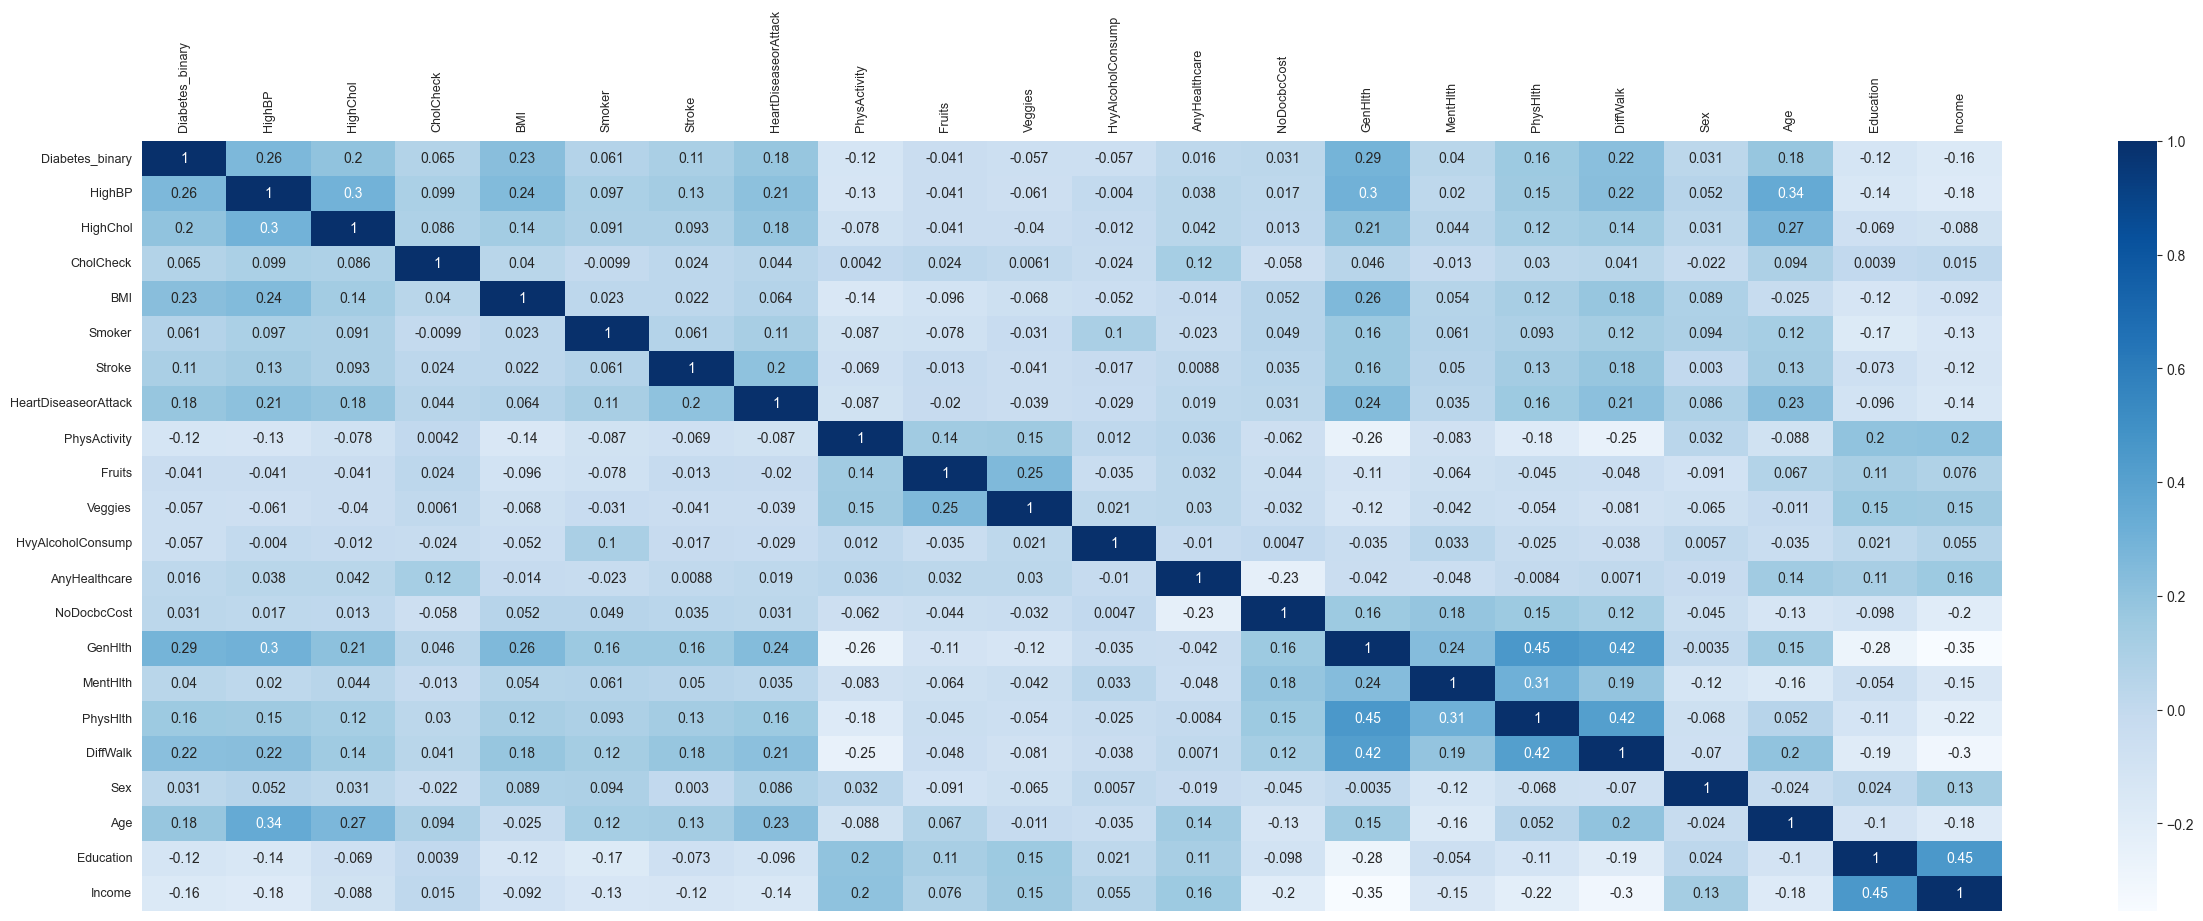

In [29]:
plt.figure(figsize=(30, 10))
sns.heatmap(DataCorr_Bin_full, cmap="Blues", annot=True)
plt.tick_params(axis='both', which='major', labelsize=9, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)

# EDA on the diabetes_binary_5050split_health_indicators_BRFSS2015.csv

In [30]:
data2use = D_Bin_50

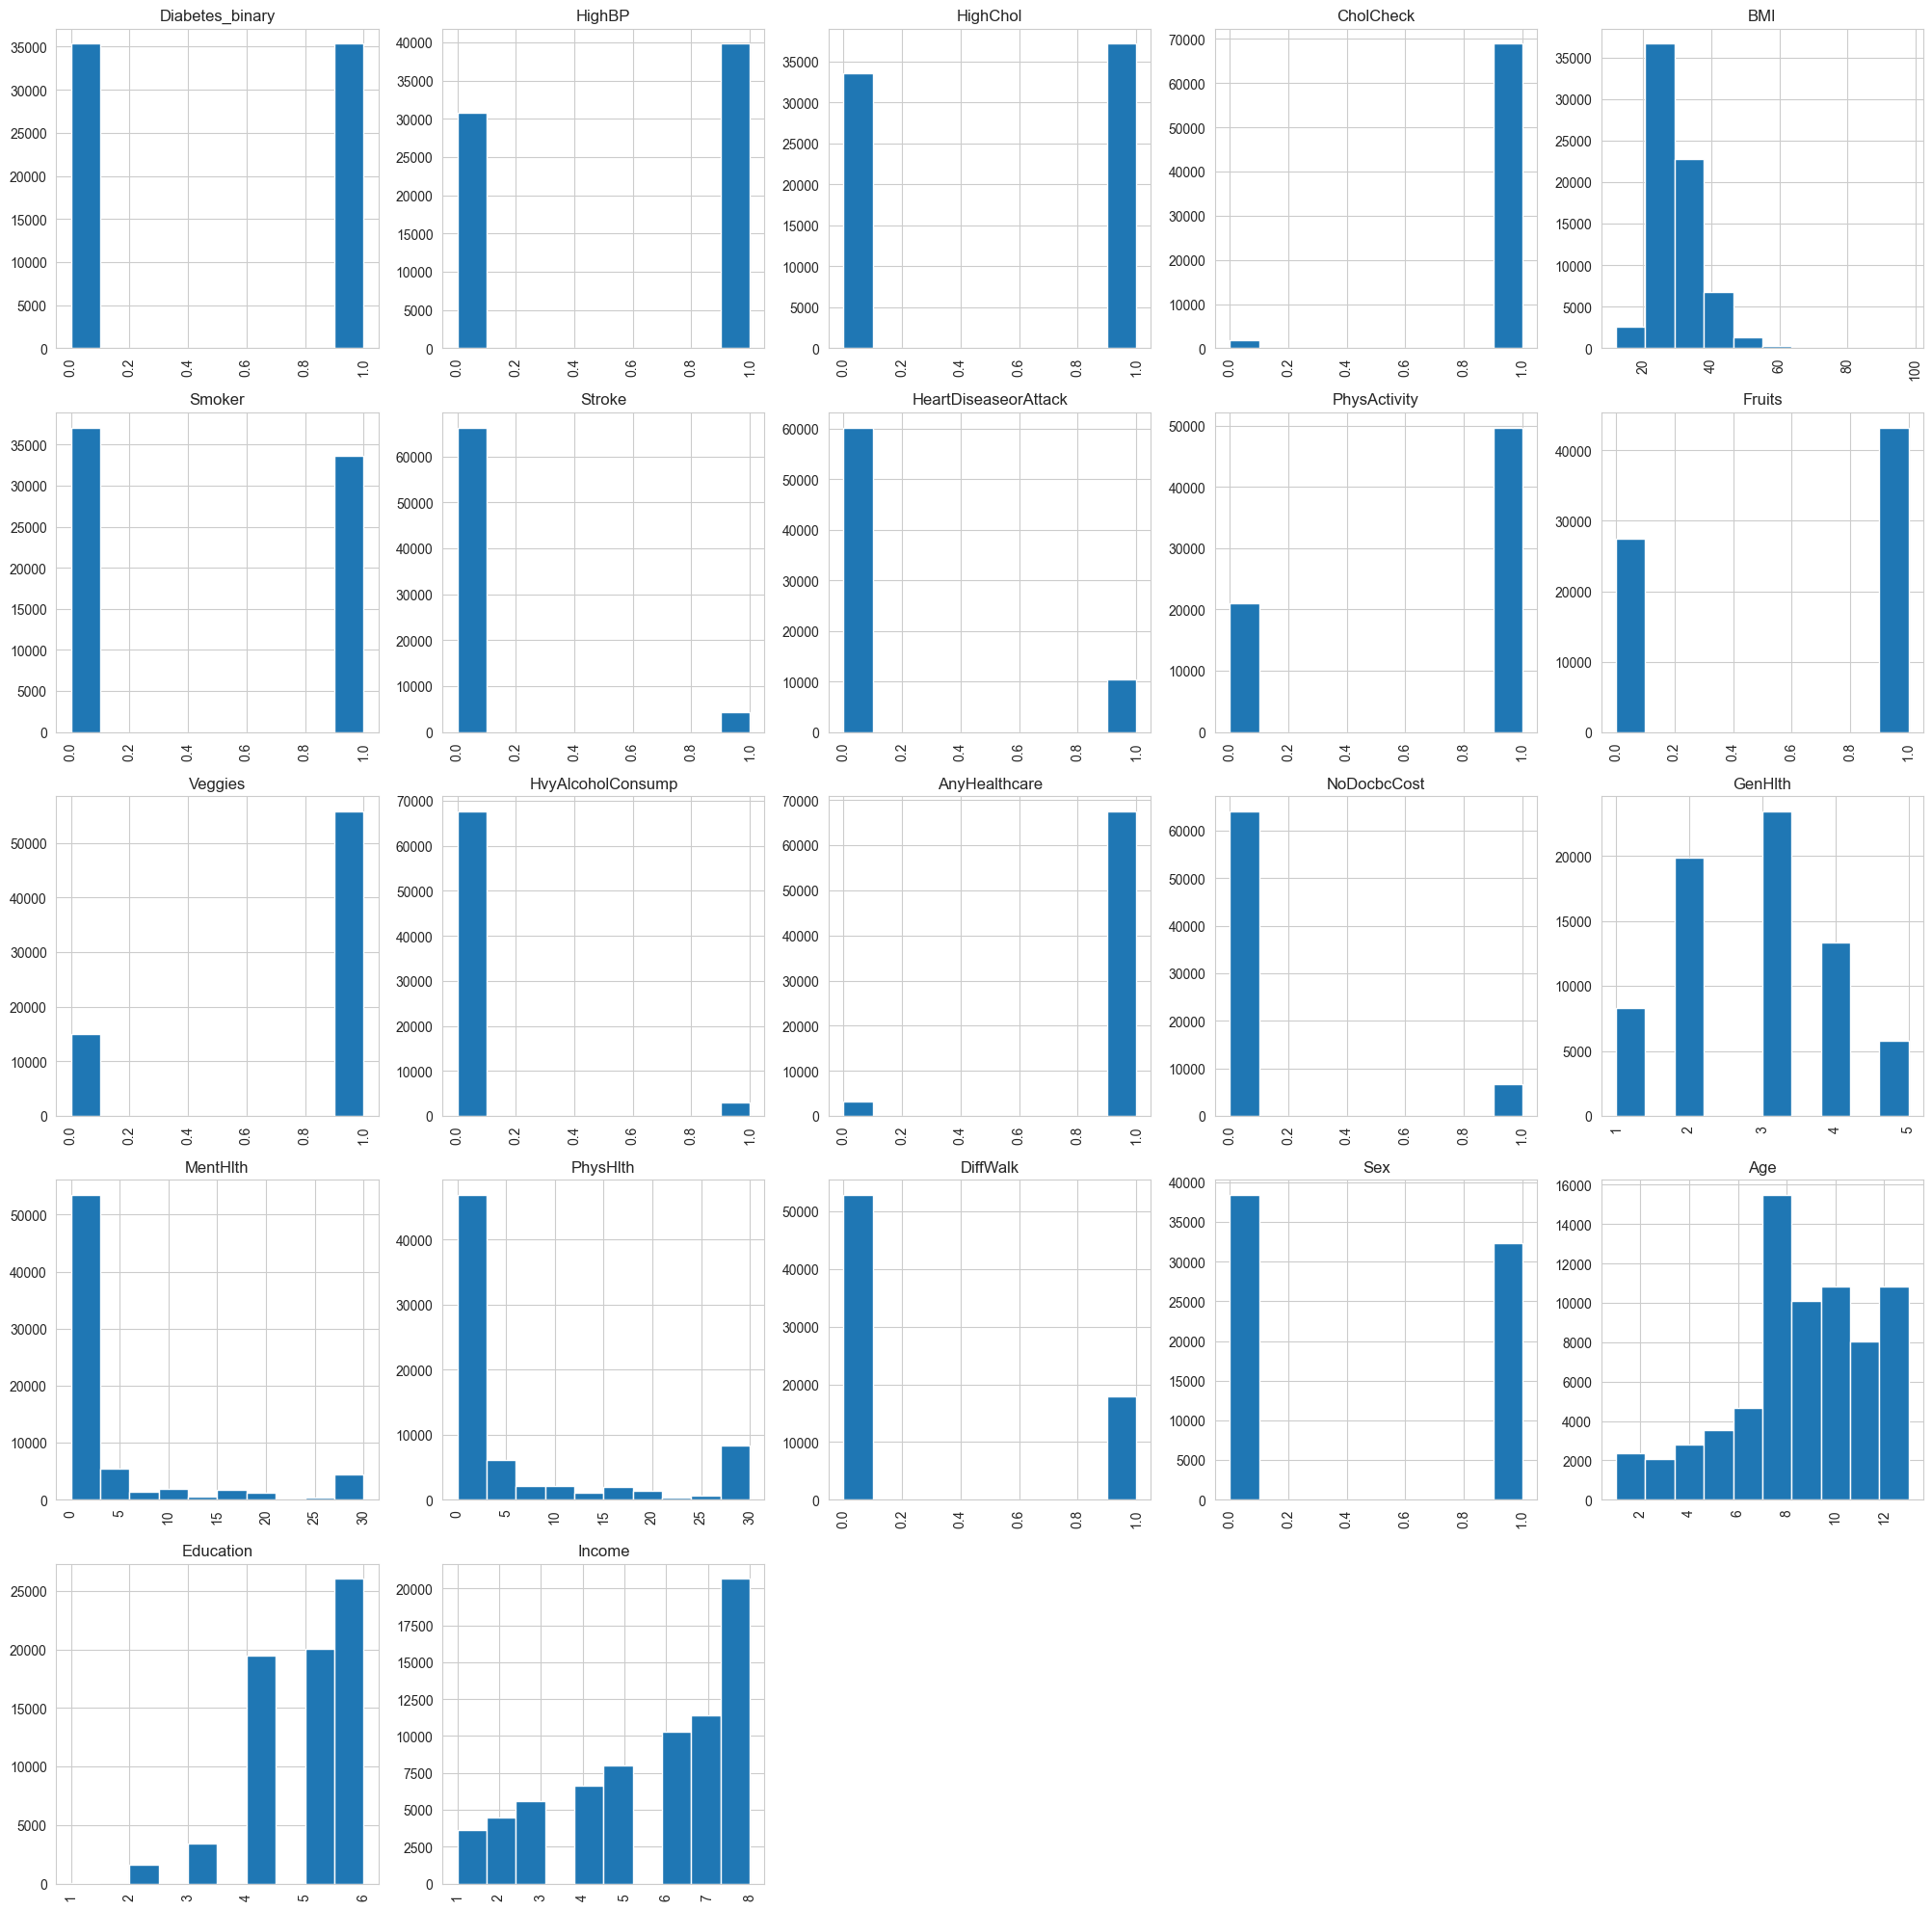

In [31]:
#make a hist for each column of data2use in a grid
fig = plt.figure(figsize=(25, 25))
cols = 5
rows = 5

for i, column in enumerate(data2use.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data2use.dtypes[column] == object:
        data2use[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data2use[column].hist(axes=ax)
        plt.xticks(rotation="vertical")

In [32]:
DataCorr_Bin_50 = data2use.corr(method="spearman")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 1, 'Diabetes_binary'),
  Text(1.5, 1, 'HighBP'),
  Text(2.5, 1, 'HighChol'),
  Text(3.5, 1, 'CholCheck'),
  Text(4.5, 1, 'BMI'),
  Text(5.5, 1, 'Smoker'),
  Text(6.5, 1, 'Stroke'),
  Text(7.5, 1, 'HeartDiseaseorAttack'),
  Text(8.5, 1, 'PhysActivity'),
  Text(9.5, 1, 'Fruits'),
  Text(10.5, 1, 'Veggies'),
  Text(11.5, 1, 'HvyAlcoholConsump'),
  Text(12.5, 1, 'AnyHealthcare'),
  Text(13.5, 1, 'NoDocbcCost'),
  Text(14.5, 1, 'GenHlth'),
  Text(15.5, 1, 'MentHlth'),
  Text(16.5, 1, 'PhysHlth'),
  Text(17.5, 1, 'DiffWalk'),
  Text(18.5, 1, 'Sex'),
  Text(19.5, 1, 'Age'),
  Text(20.5, 1, 'Education'),
  Text(21.5, 1, 'Income')])

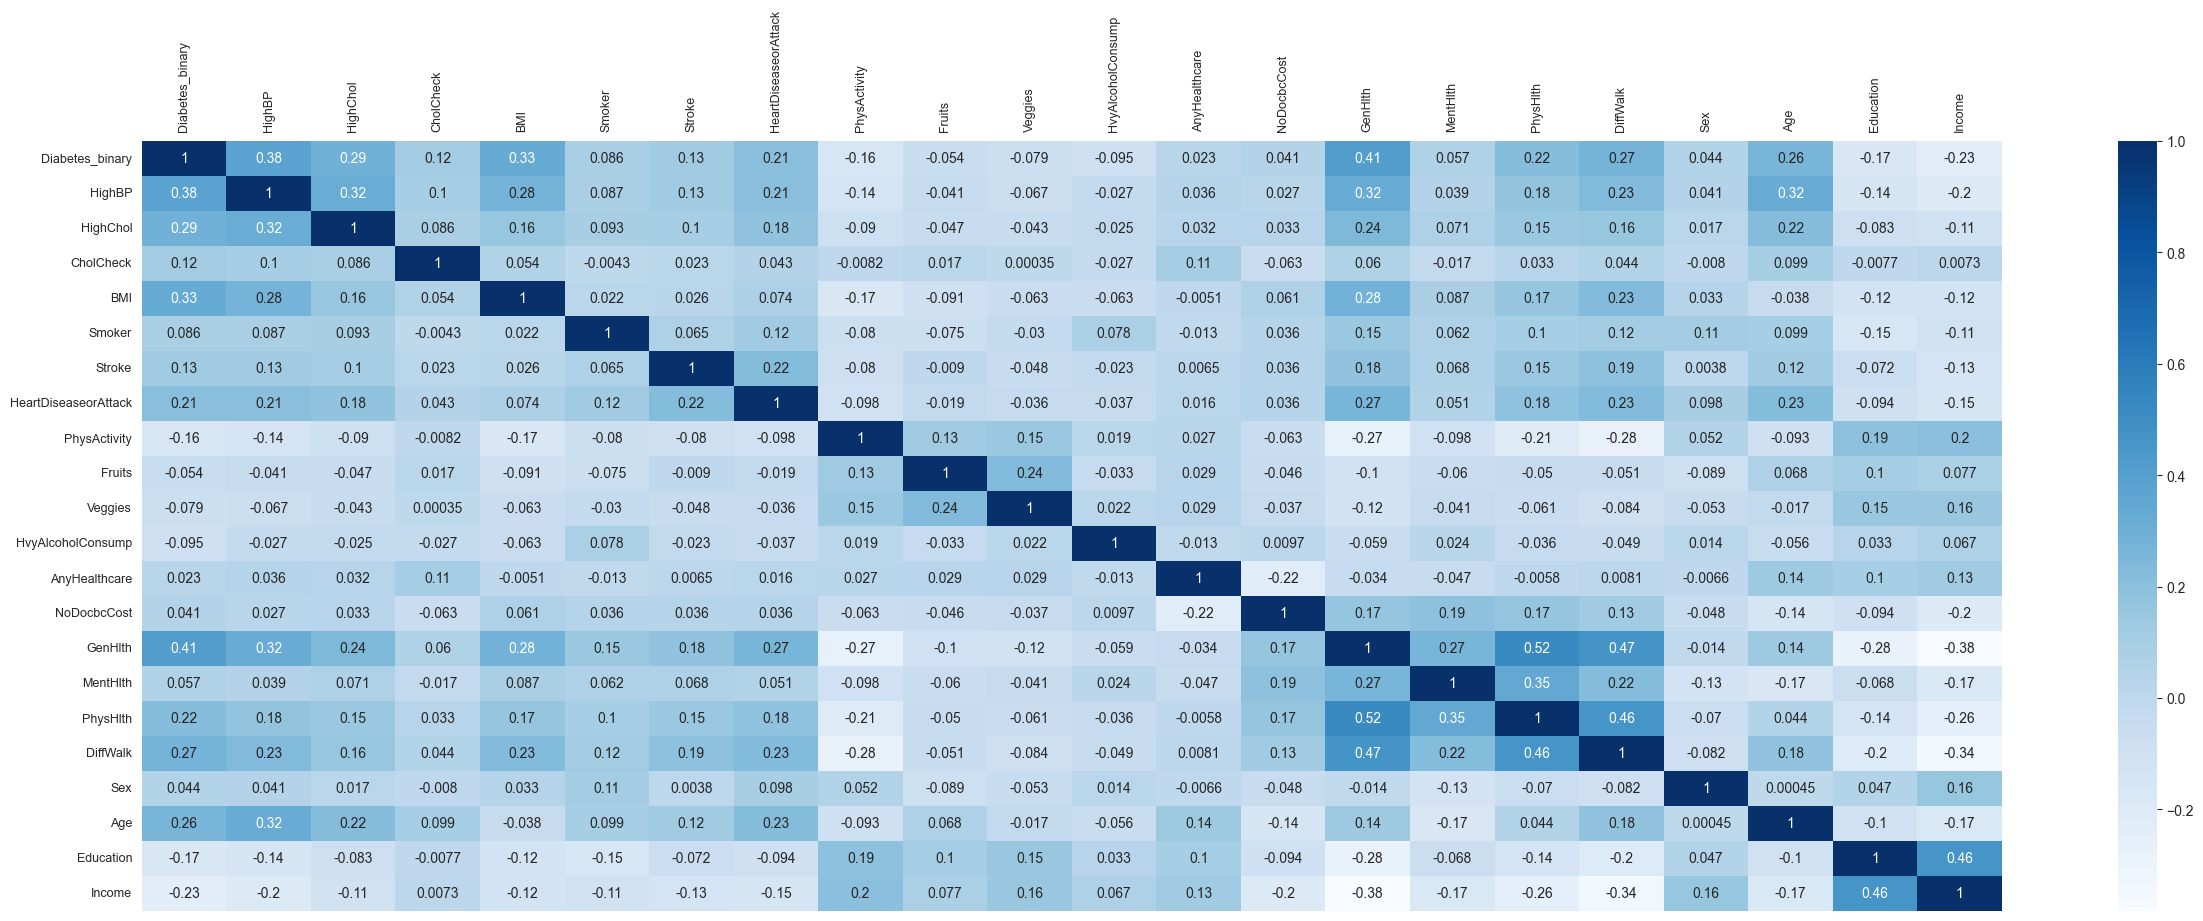

In [33]:
plt.figure(figsize=(30, 10))
sns.heatmap(DataCorr_Bin_50, cmap="Blues", annot=True)
plt.tick_params(axis='both', which='major', labelsize=9, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)

# EDA on the diabetes_012_health_indicators_BRFSS2015.csv

In [34]:
data2use = D_012

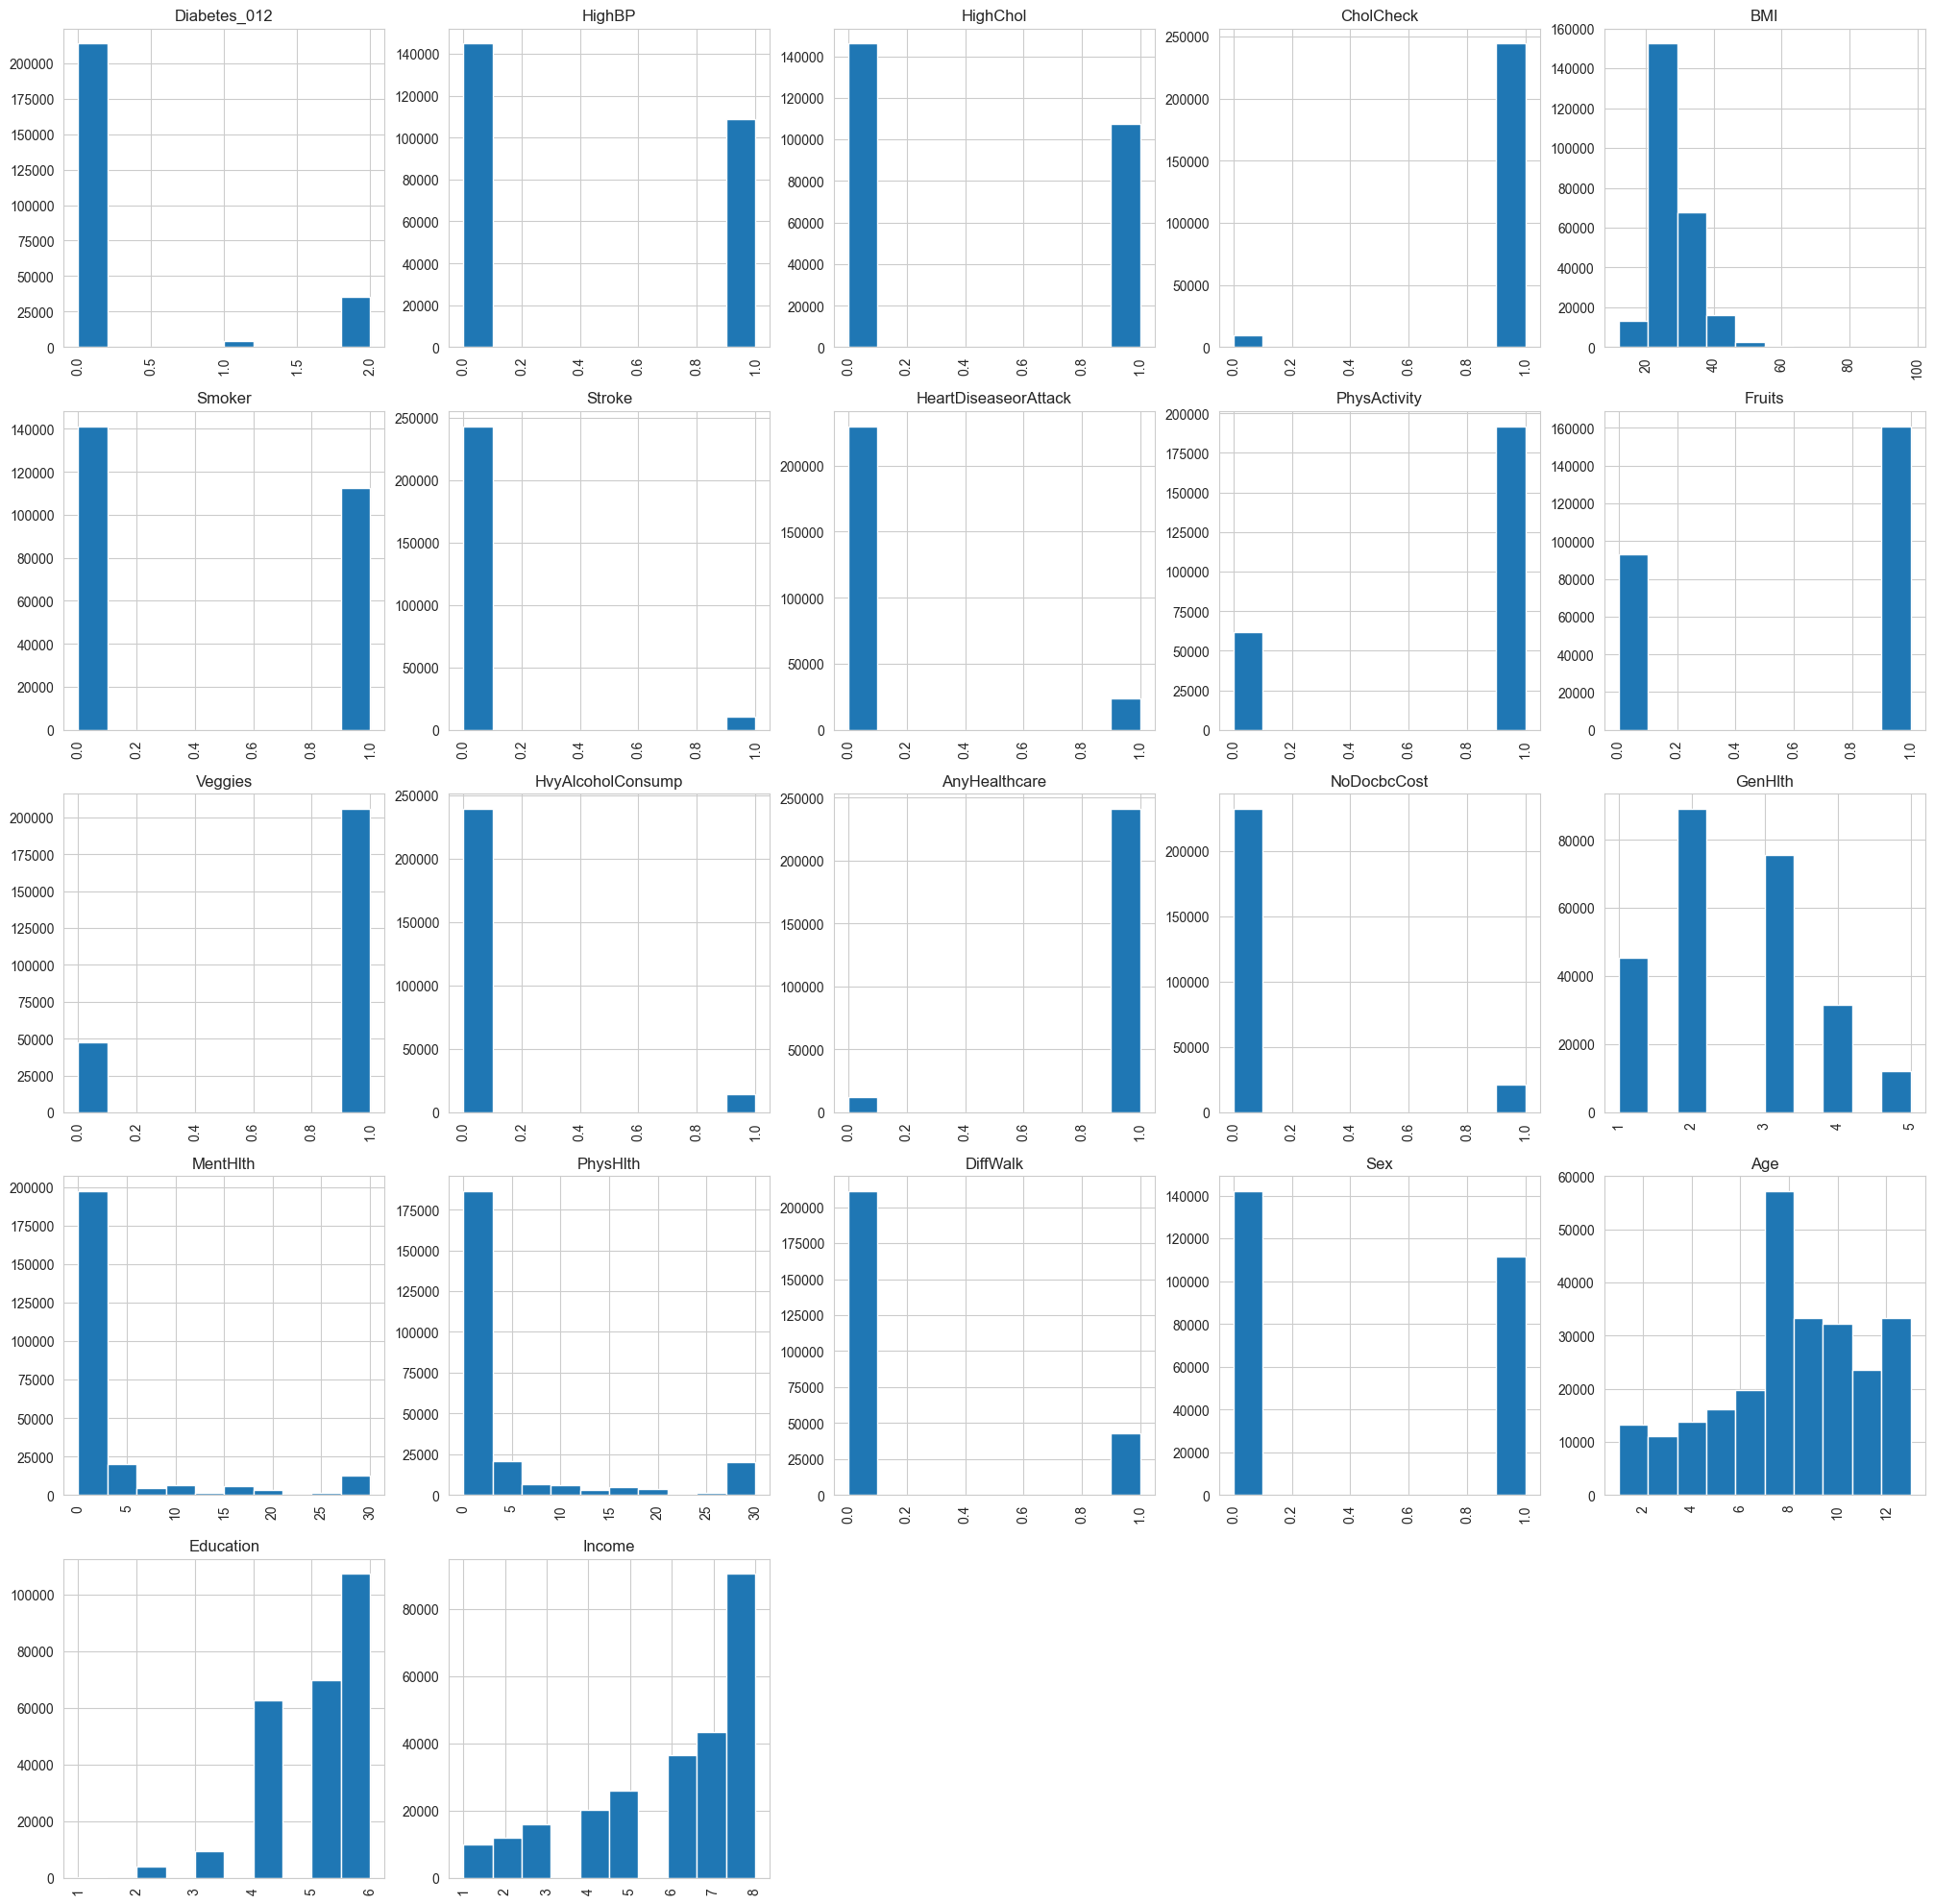

In [35]:
#make a hist for each column of data2use in a grid
fig = plt.figure(figsize=(25, 25))
cols = 5
rows = 5

for i, column in enumerate(data2use.columns):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data2use.dtypes[column] == object:
        data2use[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data2use[column].hist(axes=ax)
        plt.xticks(rotation="vertical")

In [36]:
DataCorr_012 = data2use.corr(method="spearman")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0.5, 1, 'Diabetes_012'),
  Text(1.5, 1, 'HighBP'),
  Text(2.5, 1, 'HighChol'),
  Text(3.5, 1, 'CholCheck'),
  Text(4.5, 1, 'BMI'),
  Text(5.5, 1, 'Smoker'),
  Text(6.5, 1, 'Stroke'),
  Text(7.5, 1, 'HeartDiseaseorAttack'),
  Text(8.5, 1, 'PhysActivity'),
  Text(9.5, 1, 'Fruits'),
  Text(10.5, 1, 'Veggies'),
  Text(11.5, 1, 'HvyAlcoholConsump'),
  Text(12.5, 1, 'AnyHealthcare'),
  Text(13.5, 1, 'NoDocbcCost'),
  Text(14.5, 1, 'GenHlth'),
  Text(15.5, 1, 'MentHlth'),
  Text(16.5, 1, 'PhysHlth'),
  Text(17.5, 1, 'DiffWalk'),
  Text(18.5, 1, 'Sex'),
  Text(19.5, 1, 'Age'),
  Text(20.5, 1, 'Education'),
  Text(21.5, 1, 'Income')])

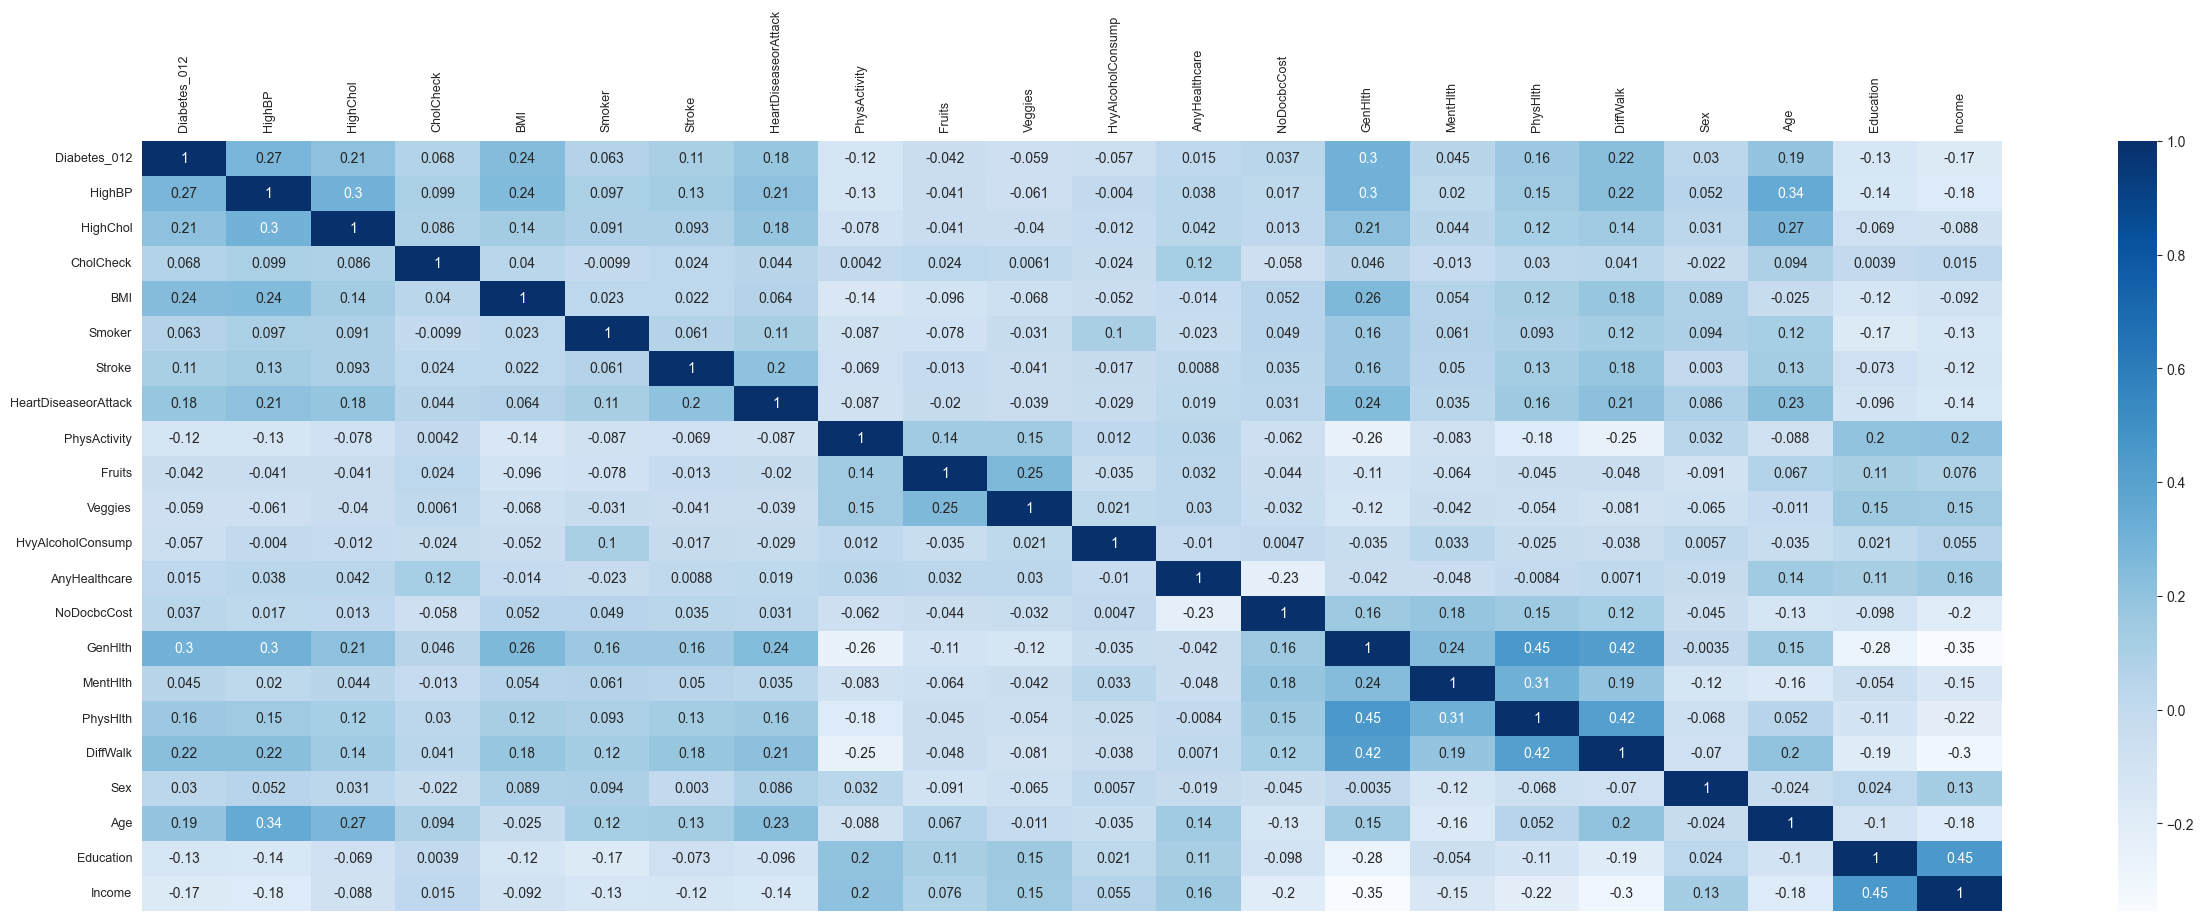

In [37]:
plt.figure(figsize=(30, 10))
sns.heatmap(DataCorr_012, cmap="Blues", annot=True)
plt.tick_params(axis='both', which='major', labelsize=9, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=90)

## Results

Features correlated to Diabetes risk are:

In [42]:
cols_012 = DataCorr_012.columns[DataCorr_012.iloc[0] > 0.2]
cols_Bin_50 = DataCorr_Bin_50.columns[DataCorr_Bin_50.iloc[0] > 0.2]
cols_Bin_full = DataCorr_Bin_full.columns[DataCorr_Bin_full.iloc[0] > 0.2]

print(cols_012[1:].tolist())
print(cols_Bin_50[1:].tolist())
print(cols_Bin_full[1:].tolist())

# combine three lists and remove duplicates
cols = list(set(cols_012[1:].tolist() + cols_Bin_50[1:].tolist() + cols_Bin_full[1:].tolist()))
print(cols)

['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk']
['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age']
['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk']
['HighBP', 'PhysHlth', 'DiffWalk', 'BMI', 'GenHlth', 'HighChol', 'HeartDiseaseorAttack', 'Age']
